In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()

In [4]:
data = faces.data
images = faces.images
target = faces.target

In [5]:
images.shape

(400, 64, 64)

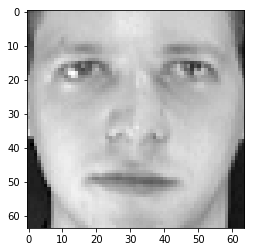

In [7]:
plt.imshow(images[0],cmap='gray')

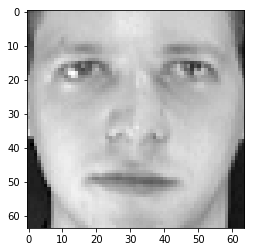

In [10]:
plt.imshow(data[0].reshape(64,64),cmap='gray')

In [ ]:
# 这是一个回归问题，而不是分类问题
# knn linearRegression Ridge Lasso

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knn = KNeighborsRegressor()

In [14]:
target
# 数据集一共包含40个人，每一个人10张照片，分布规律
# 每一个人取出8张照片作为训练数据，2张照片作为测试数据
# 样本特征和样本标签如何拆分？上半边脸作为样本特征，下半边脸作为特征标签

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [15]:
len(data)

400

In [18]:
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(40):
    for j in range(10):
        face_data = data[i*10+j]
        up_face = face_data[:2048]
        bottom_face = face_data[2048:]
        if j < 8:
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

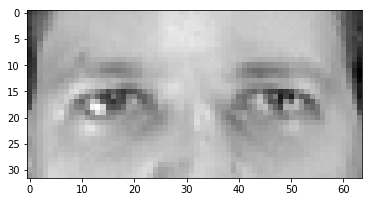

In [23]:
plt.imshow(X_train[0].reshape(32,64),cmap='gray')

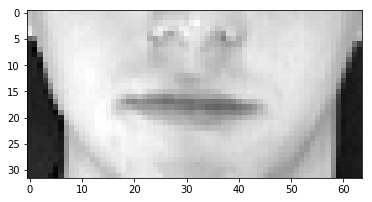

In [24]:
plt.imshow(y_train[0].reshape(32,64),cmap='gray')

In [26]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
y_ = knn.predict(X_test)

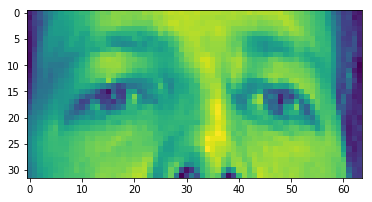

In [33]:
plt.imshow(X_test[0].reshape(32,64))

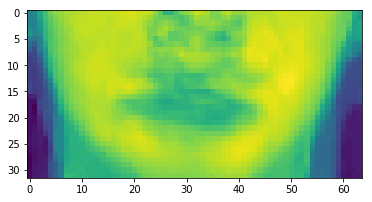

In [31]:
plt.imshow(y_[0].reshape(32,64))

In [38]:
up_face = X_test[0]
bottom_face = y_[0]

pre_face = np.concatenate((up_face,bottom_face))

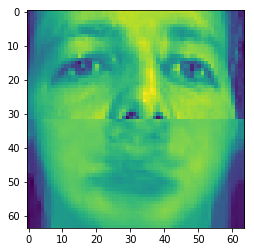

In [39]:
plt.imshow(pre_face.reshape(64,64))

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [41]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [42]:
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
line_y_ = linear.predict(X_test)
ridge_y_ = ridge.predict(X_test)
lasso_y_ = lasso.predict(X_test)

In [58]:
# 把所有的预测结果保存的一个列表
pre_results = [y_,line_y_,ridge_y_,lasso_y_]
titles = ['True','KNN','Linear','Ridge','Lasso']

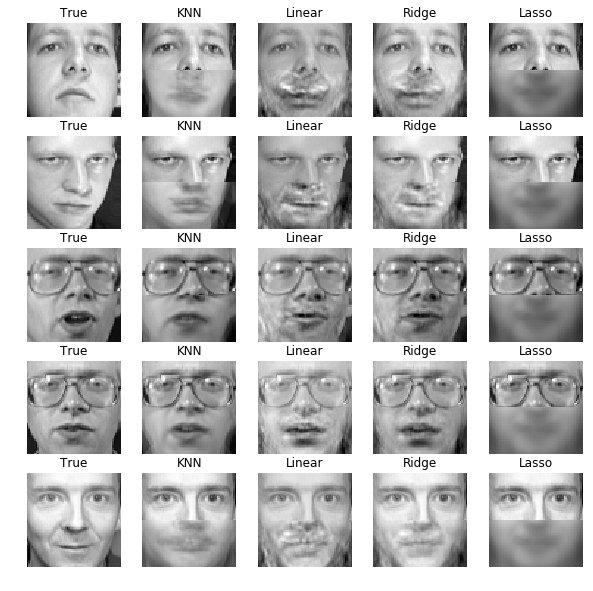

In [59]:
plt.figure(figsize=(10,10))
for i in range(5):
    # 先取出真实的脸
    true_up_face = X_test[i].reshape(32,64)
    true_bottom_face = y_test[i].reshape(32,64)
    true_face = np.concatenate((true_up_face,true_bottom_face),axis=0)
    axes = plt.subplot(5,5,5*i+1)
    axes.set_title(titles[0])
    axes.axis('off')
    plt.imshow(true_face,cmap='gray')
    for index,y_ in enumerate(pre_results):
        # 获取到每一种算法模型预测出的下半边脸的数据
        pre_bottom_face = y_[i].reshape(32,64)
        pre_face = np.concatenate((true_up_face,pre_bottom_face),axis=0)
        axes = plt.subplot(5,5,5*i+index+2)
        axes.set_title(titles[index+1])
        axes.axis('off')
        plt.imshow(pre_face,cmap='gray')

In [50]:
for i,j in enumerate(pre_results):
    print(i,j)

0 [[0.43223137 0.4471074  0.5371901  ... 0.19421487 0.20743802 0.20413224]
 [0.59421486 0.6231405  0.6586777  ... 0.22727272 0.2338843  0.23719008]
 [0.6404959  0.6801653  0.7        ... 0.14214876 0.13801654 0.12396693]
 ...
 [0.3272727  0.3578512  0.38099173 ... 0.26528925 0.25785127 0.23966941]
 [0.35123968 0.3289256  0.3371901  ... 0.49008265 0.4867769  0.49008265]
 [0.43884295 0.5008265  0.54380167 ... 0.3859504  0.35619834 0.36694214]]
1 [[0.40869087 0.45325565 0.55210173 ... 0.25842407 0.22158346 0.19530061]
 [0.4665262  0.5169739  0.5839862  ... 0.485482   0.34054744 0.40059197]
 [0.73070145 0.7508674  0.7531006  ... 0.0507921  0.05191332 0.0270541 ]
 ...
 [0.16948584 0.1855065  0.3031096  ... 0.2980361  0.18646538 0.16179678]
 [0.31775352 0.29732966 0.3137101  ... 0.7070402  0.70085406 0.6401963 ]
 [0.4708116  0.45967263 0.46114904 ... 0.23726511 0.29164436 0.36143413]]
2 [[0.42233413 0.47087216 0.54689338 ... 0.17177785 0.14376203 0.13857888]
 [0.46842669 0.5094467  0.5631840

In [ ]:
# 观察结果
# KNN 和 Ridge回归效果较好
# Lineaer过拟合
# Lasso欠拟合